<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [7]:
def cal_mean(val_lst):
    '''
    Calculates the mean of given input list
    args:
    val_lst (list): numbers to calculate mean
    return:
    (float): mean value of input numbers
    '''
    return float(sum(val_lst)/len(val_lst))

In [10]:
assert cal_mean([5]) == 5
assert cal_mean([1,2,3]) == 2
assert cal_mean([3.3,3.3,3.3,3.3]) == 3.3

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [28]:
def std_dev(x_lst):
    '''
    Calculate the POPULATION standard deviation of numbers
    args:
    x_lst (list): list of int or float to calculate thier standard deviation
    return:
    sig (float): standard deviation of input numbers
    '''
    miu = cal_mean(x_lst)
    n = len(x_lst)
    delta = [((x-miu)**2) for x in x_lst]
    sig = (sum(delta)/n)**(0.5)
    return sig

In [29]:
import statistics
assert std_dev([1,2,3,4,5]) == statistics.pstdev([1,2,3,4,5])

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [2]:
# Read and display the data for number of rainy days
rainy_days_df = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
rainy_days_df.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [3]:
# Check for null values
rainy_days_df.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

In [4]:
# Check for anomalies
# Check for simple stats figure
display(rainy_days_df.describe())
# Check for data types
rainy_days_df.info()

,no_of_rainy_days
count,488.000000
mean,14.061475
std,4.947394
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [5]:
# Change to datetime
# rainy_days_df['month'] = pd.to_datetime(rainy_days_df['month'])
# rainy_days_df['year'] = pd.DatetimeIndex(rainy_days_df['month']).year
# rainy_days_df['month'] = pd.DatetimeIndex(rainy_days_df['month']).month
# rainy_days_df = rainy_days_df[['year', 'month', 'no_of_rainy_days']]
display(rainy_days_df.head())
display(rainy_days_df.describe())
rainy_days_df.info()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


,no_of_rainy_days
count,488.000000
mean,14.061475
std,4.947394
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [ ]:
# Create a master data frame to compile the information
# The master data frame is named weather_n_pv_df
weather_n_pv_df = rainy_days_df

In [7]:
# Process the rainfall-monthly-total.csv data
rainfall_total_df = pd.read_csv('../data/rainfall-monthly-total.csv')
display(rainfall_total_df.head())
display(rainfall_total_df.info())

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


None

In [8]:
# rainfall_total_df['month'] = pd.to_datetime(rainfall_total_df['month'])
# rainfall_total_df['year'] = pd.DatetimeIndex(rainfall_total_df['month']).year
# rainfall_total_df['month'] = pd.DatetimeIndex(rainfall_total_df['month']).month
# rainfall_total_df = rainfall_total_df[['year', 'month', 'total_rainfall']]
display(rainfall_total_df.describe())
rainfall_total_df.info()

,total_rainfall
count,488.000000
mean,177.163730
std,113.916029
min,0.200000
25%,93.850000
50%,159.450000
75%,238.075000
max,765.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [9]:
# weather_n_pv_df = weather_n_pv_df.merge(rainfall_total_df)
# weather_n_pv_df.head()

In [10]:
# Process the sunshin-monthly-mean.csv data
sunshine_df = pd.read_csv('../data/sunshine-monthly-mean.csv')
# sunshine_df['month'] = pd.to_datetime(sunshine_df['month'])
display(sunshine_df.head())
display(sunshine_df.info())

,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              490 non-null    object 
 1   mean_sunshine_hrs  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


None

* observation: The total data entry for sunshine is 490, while rainfall is only 488?
---
Why is that so? The most likely reason is that the given datasets are outdated.
To confirm this theory, compare the datasets.

In [11]:
sunshine_df.tail(4)

,month,mean_sunshine_hrs
486,2022-07,6.2
487,2022-08,5.5
488,2022-09,3.8
489,2022-10,3.5


In [12]:
display(rainfall_total_df.tail(2))
display(rainy_days_df.tail(2))

,month,total_rainfall
486,2022-07,145.2
487,2022-08,141.4


,month,no_of_rainy_days
486,2022-07,16
487,2022-08,15


---
`sunshine_df` included information for Sep 22 and Oct 22, while `rainfall_total_df` and `rainy_days_df` doesn't.  
This shows that additional information is not added to the 2 data sets. Manual addition can be done.
Viewing from [data.gov.sg](https://data.gov.sg/) the following results are observed.  

<img src='../img/rain_amt.png' alt="Screen shot of total rain ammount for Sep and Oct 2022">

<img src='../img/rain_days.png' alt="Screen shot of number of rain days for Sep and Oct 2022">

In [13]:
extra_rainfall = {"month" : ['2022-09', '2022-10'], "total_rainfall": [121, 280]}
extra_rainfall = pd.DataFrame(extra_rainfall)
rainfall_total_df = pd.concat([rainfall_total_df, extra_rainfall], ignore_index = True)
rainfall_total_df.tail()

,month,total_rainfall
485,2022-06,211.8
486,2022-07,145.2
487,2022-08,141.4
488,2022-09,121.0
489,2022-10,280.0


In [14]:
extra_rain_days = {"month" : ['2022-09', '2022-10'], "no_of_rainy_days": [14, 27]}
extra_rain_days = pd.DataFrame(extra_rainfall)
rainy_days_df = pd.concat([rainy_days_df, extra_rain_days], ignore_index = True)
rainy_days_df.tail()

,month,no_of_rainy_days
485,2022-06,17
486,2022-07,16
487,2022-08,15
488,2022-09,14
489,2022-10,27


Now all three DataFrame containing weather information are the same, we can combine the three DataFrame together for data cleaning and manipulation.

In [15]:
# make a master DataFrame of weather data, named 'weather_data_df'
weather_data_df = rainy_days_df.merge(rainfall_total_df, how='inner')
weather_data_df = weather_data_df.merge(sunshine_df, how='inner')
weather_data_df.head()

,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs
0,1982-01,10,107.1,5.6
1,1982-02,5,27.8,7.6
2,1982-03,11,160.8,5.1
3,1982-04,14,157.0,4.7
4,1982-05,10,102.2,5.8


In [16]:
# converts the 'month' obj into datetime class
weather_data_df['month'] = pd.to_datetime(weather_data_df['month'])
# Split the year and month of the data
weather_data_df['year'] = pd.DatetimeIndex(weather_data_df['month']).year
weather_data_df['month_in_yr'] = pd.DatetimeIndex(weather_data_df['month']).month
weather_data_df.head()

,month,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,year,month_in_yr
0,1982-01-01,10,107.1,5.6,1982,1
1,1982-02-01,5,27.8,7.6,1982,2
2,1982-03-01,11,160.8,5.1,1982,3
3,1982-04-01,14,157.0,4.7,1982,4
4,1982-05-01,10,102.2,5.8,1982,5


In [17]:
weather_data_df.describe()

,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,year,month_in_yr
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,14.087755,177.258980,5.680000,2001.918367,6.479592
std,4.971746,113.806214,1.210287,11.798993,3.447620
min,1.000000,0.200000,2.700000,1982.000000,1.000000
25%,11.000000,94.050000,4.800000,1992.000000,3.250000
50%,14.000000,159.450000,5.650000,2002.000000,6.000000
75%,18.000000,238.225000,6.475000,2012.000000,9.000000
max,27.000000,765.900000,9.300000,2022.000000,12.000000


In [18]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              490 non-null    datetime64[ns]
 1   no_of_rainy_days   490 non-null    int64         
 2   total_rainfall     490 non-null    float64       
 3   mean_sunshine_hrs  490 non-null    float64       
 4   year               490 non-null    int64         
 5   month_in_yr        490 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 26.8 KB


Looking at the information, all 490 entries are not null. The standard deviation seems reasonable. Proceed to process additional data before analysis.

In [127]:
# rainfall_total_df['month'] = pd.to_datetime(rainfall_total_df['month'])

# rainfall_total_df.head()

,month,total_rainfall
0,1982-01-01,107.1
1,1982-02-01,27.8
2,1982-03-01,160.8
3,1982-04-01,157.0
4,1982-05-01,102.2
...,...,...
485,2022-06-01,211.8
486,2022-07-01,145.2
487,2022-08-01,141.4
488,2022-09-01,121.0


In [ ]:
# sunshine_df['month'] = pd.to_datetime(sunshine_df['month'])
# # sunshine_df['year'] = pd.DatetimeIndex(sunshine_df['month']).year
# # sunshine_df['month'] = pd.DatetimeIndex(sunshine_df['month']).month
# # sunshine_df_df = sunshine_df_df[['year', 'month', 'total_rainfall']]
# display(sunshine_df.describe())
# sunshine_df.info()

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [41]:
# Make deep copy to keep original untouched, drop month and year as it is redundent in this analysis
weather_data_df_copy = weather_data_df.copy(deep = True)
weather_data_df_copy.drop(columns = ['month', 'year'], inplace=True)
# group by months to observe change within a year
grp_by_month = weather_data_df_copy.groupby('month_in_yr')
grp_by_month.agg([np.mean, np.median, np.std, np.sum])

no_of_rainy_days                       total_rainfall          \
                        mean median       std  sum           mean  median   
month_in_yr                                                                 
1                  13.365854   13.0  5.425662  548     234.295122  193.90   
2                   8.292683    8.0  5.158701  340     103.919512   69.20   
3                  12.487805   11.0  5.450330  512     160.904878  136.20   
4                  14.439024   14.0  3.633516  592     158.480488  158.50   
5                  13.926829   13.0  3.304469  571     166.221951  157.50   
6                  13.195122   13.0  3.226604  541     135.180488  118.30   
7                  13.512195   13.0  3.994508  554     147.387805  143.20   
8                  13.902439   13.0  3.839303  570     149.424390  146.60   
9                  13.243902   13.0  4.340394  543     146.646341  125.90   
10                 15.243902   16.0  4.768545  625     162.612195  166.20   
11                 19.025000   19.0  3.612567  761     256.170000  250.80   
12                 18.650000   19.0  3.309272  746     311.052500  297.45   

                                 mean_sunshine_hrs                          
                    std      sum              mean median       std    sum  
month_in_yr                                                                 
1            167.178569   9606.1          5.719512    5.6  1.322161  234.5  
2            106.165449   4260.7          7.100000    7.2  1.430035  291.1  
3            100.613478   6597.1          6.304878    6.4  1.361975  258.5  
4             70.630079   6497.7          6.034146    5.9  0.662046  247.4  
5             75.146209   6815.1          5.956098    5.9  0.509926  244.2  
6             65.547236   5542.4          5.929268    6.0  0.798825  243.1  
7             70.139679   6042.9          6.102439    6.2  0.983486  250.2  
8             71.926281   6126.4          5.846341    5.8  0.796272  239.7  
9             90.195147   6012.5          5.270732    5.3  0.844465  216.1  
10            82.781759   6667.1          5.024390    5.0  0.788600  206.0  
11           102.026194  10246.8          4.452500    4.5  0.677093  178.1  
12           144.618916  12442.1          4.357500    4.5  0.859901  174.3

By observation, Feb have the least rain per month... Hmm, but Feb is the shortest month in a year, so this is to be expected!  
Now putting Feb data aside, observe the other months with 30 and 31 days in them, Nov, Dec stands out as they have the highest number of rainy days, highest total rainfall and least sunshine!

---

In [46]:
# Make deep copy to keep original untouched, drop month and month_in_yr as it is redundent in this analysis
weather_data_df_copy = weather_data_df.copy(deep = True)
weather_data_df_copy.drop(columns = ['month', 'month_in_yr'], inplace=True)
# group by year to observe change across years
grp_by_year = weather_data_df_copy.groupby('year')
grp_by_yr_res = grp_by_year.agg([np.mean, np.median, np.std, np.sum])
display(grp_by_yr_res)

no_of_rainy_days                       total_rainfall          \
                 mean median       std  sum           mean  median   
year                                                                 
1982        10.833333   10.0  3.973396  130     131.808333  104.65   
1983        12.083333   13.5  6.430868  145     166.141667  180.40   
1984        15.916667   17.0  3.449857  191     223.891667  187.10   
1985        15.083333   14.0  4.718596  181     123.658333  110.60   
1986        14.500000   13.5  5.385165  174     211.341667  188.65   
1987        12.583333   11.5  3.287949  151     175.233333  128.25   
1988        14.416667   14.0  3.396745  173     216.550000  208.20   
1989        14.416667   15.0  5.017394  173     205.266667  191.85   
1990        11.833333   12.0  3.833663  142     126.983333  135.30   
1991        12.166667   11.0  5.556869  146     156.416667  123.50   
1992        13.583333   13.0  5.696224  163     188.400000  122.10   
1993        13.583333   13.5  4.316108  163     180.725000  175.95   
1994        13.333333   14.5  5.051252  160     161.816667  143.75   
1995        14.916667   14.5  4.776045  179     194.383333  192.60   
1996        14.166667   15.0  3.588703  170     201.500000  180.20   
1997         9.666667    9.0  5.297226  116      93.241667   78.65   
1998        14.750000   16.0  5.154433  177     218.591667  210.75   
1999        14.750000   13.5  3.441062  177     177.833333  187.65   
2000        15.666667   15.5  3.420083  188     197.541667  196.75   
2001        15.333333   14.5  4.271115  184     231.925000  170.10   
2002        11.583333   11.5  5.299371  139     145.741667  120.35   
2003        15.500000   14.5  3.729489  186     199.266667  171.65   
2004        12.250000   13.0  4.309081  147     178.033333  138.70   
2005        14.583333   15.0  5.712161  175     160.891667  133.60   
2006        14.500000   14.5  4.622081  174     229.433333  169.70   
2007        16.250000   17.5  5.259191  195     240.516667  213.95   
2008        15.166667   16.0  3.485902  182     193.758333  161.95   
2009        13.833333   14.0  5.201981  166     160.075000  180.75   
2010        14.833333   16.5  4.725816  178     172.925000  162.35   
2011        15.666667   15.0  5.365434  188     210.350000  214.90   
2012        15.916667   16.5  4.981025  191     179.991667  126.50   
2013        17.166667   18.0  3.857303  206     229.033333  234.20   
2014        12.666667   13.0  6.705945  152     128.200000  115.00   
2015        10.416667   10.5  3.964807  125     105.591667   85.80   
2016        14.916667   15.0  4.621262  179     162.975000  165.70   
2017        17.000000   18.0  5.045250  204     170.466667  147.30   
2018        15.666667   15.5  6.429101  188     142.350000  143.80   
2019        10.000000    9.0  4.369314  120     113.958333   70.60   
2020        14.833333   16.0  5.507571  178     157.216667  145.50   
2021        15.166667   14.0  5.718126  182     234.133333  200.60   
2022        16.500000   16.0  4.927248  165     167.900000  154.20   

                         mean_sunshine_hrs                         
             std     sum              mean median       std   sum  
year                                                               
1982  124.084571  1581.7          5.750000   5.60  1.252271  69.0  
1983  110.550214  1993.7          5.625000   5.65  2.034755  67.5  
1984  107.293450  2686.7          5.083333   5.30  0.960902  61.0  
1985   80.141392  1483.9          5.591667   5.55  1.235430  67.1  
1986  124.253052  2536.1          5.525000   5.50  1.001930  66.3  
1987  154.035936  2102.8          5.916667   5.70  1.388153  71.0  
1988  120.126937  2598.6          5.375000   5.50  0.897598  64.5  
1989  115.633129  2463.2          5.533333   5.50  0.578923  66.4  
1990   60.602038  1523.8          6.200000   5.90  1.251181  74.4  
1991  127.487274  1877.0          5.375000   5.45  1.440407  64.5  
1992  158.155384  2260.8          5.5250

In [48]:
grp_by_yr_res.describe()

no_of_rainy_days                                   total_rainfall  \
                  mean     median        std         sum           mean   
count        41.000000  41.000000  41.000000   41.000000      41.000000   
mean         14.097561  14.134146   4.729274  168.365854     177.220935   
std           1.883122   2.233339   0.902199   22.127761      37.648958   
min           9.666667   9.000000   3.287949  116.000000      93.241667   
25%          12.666667  13.000000   3.964807  152.000000     157.216667   
50%          14.583333  14.500000   4.776045  174.000000     177.833333   
75%          15.333333  15.500000   5.299371  182.000000     205.266667   
max          17.166667  18.000000   6.705945  206.000000     240.516667   

                                           mean_sunshine_hrs             \
           median         std          sum              mean     median   
count   41.000000   41.000000    41.000000         41.000000  41.000000   
mean   157.904878  107.552855  2118.460976          5.679756   5.674390   
std     39.444920   31.744629   456.880951          0.357184   0.396409   
min     70.600000   59.725837  1118.900000          5.050000   4.900000   
25%    128.250000   80.141392  1877.000000          5.433333   5.450000   
50%    162.350000  107.293450  2134.000000          5.625000   5.650000   
75%    187.650000  124.747198  2463.200000          5.916667   5.850000   
max    234.200000  197.528577  2886.200000          6.783333   6.850000   

                             
             std        sum  
count  41.000000  41.000000  
mean    1.181637  67.882927  
std     0.258423   4.675035  
min     0.578923  56.200000  
25%     1.026468  65.000000  
50%     1.170729  67.500000  
75%     1.351178  71.000000  
max     2.034755  81.400000

In [52]:
yearly_rainfall_mean = grp_by_yr_res['total_rainfall']['mean']

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


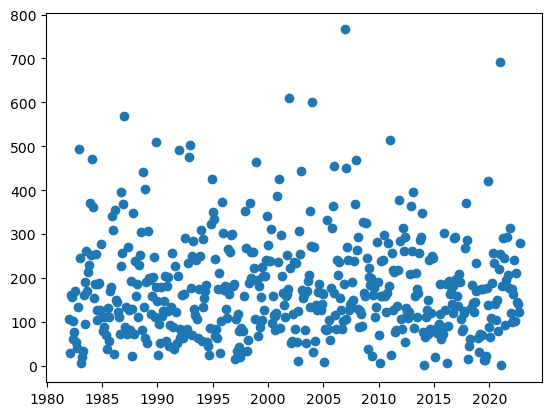

In [19]:
# Code
# weather_data_df.plot()
plt.scatter(weather_data_df['month'], weather_data_df['total_rainfall'])

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!